In [1]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

salary_df=pd.read_csv(path_data+'salary_df.csv')
salary_df.head()

,Title,Gender,Ethnicity,Annual Salary,Years of Employment
0,Fire Specialist,F,Hispanic or Latino,79799.98,11
1,Fire Specialist,M,Hispanic or Latino,79799.98,11
2,Fire Specialist,M,Hispanic or Latino,83785.26,15
3,Fire Specialist,M,Hispanic or Latino,79799.98,12
4,Fire Specialist,M,Hispanic or Latino,96991.96,24


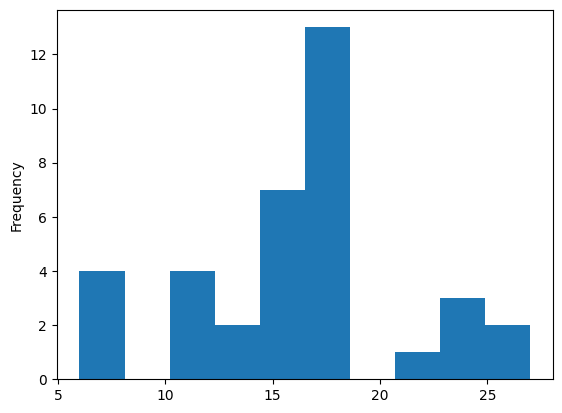

[ True  True  True False False]
[15. 10.  5.]


'\nMoving from point estimates to hypothesis tests is a big and important step! Notice how the test concludes that the Years of Employment may be normally distributed when assessed at the 2.5% significance level or below, but not below that. A typical bar for statistical significance is to be significant at 5%. Therefore, we can conclude that Years of Employment for these employees is indeed approximately normally distributed.\n'

In [3]:
# exercise 01

"""
Testing for normality

A powerful suite of statistical tools, which includes several common hypothesis tests, depends on the assumption that the underlying data is normally distributed. While a histogram can hint at whether the data is approximately normally distributed, various hypothesis tests allow us to test this assumption directly. Moreover, histograms can be very sensitive to the number of bins, especially when the sample sizes are small.

In this exercise you'll work with salary data from employees for the City of Austin in salary_df. In particular you will be working with Hispanic firefighters. You'll analyze if their years of employment are approximately normally distributed using the Anderson-Darling hypothesis test.
"""

# Instructions

"""

    Plot a histogram showing the Years of Employment for the employees.
    Conduct an Anderson-Darling test for normality to see if Years of Employment is approximately normally distributed.
    Find which critical_values the test statistic is greater than.
    Print the significance_level(s) at which the null hypothesis would be rejected.

"""

# solution

# Plot a histogram of the employees' "Years of Employment"
salary_df['Years of Employment'].plot(kind="hist")
plt.show()

# Conduct an Anderson-Darling test using the years of employment from salary_df
result = stats.anderson(salary_df['Years of Employment'])

# Print which critical values the test statistic is greater than the critical values
print(result.statistic > result.critical_values)

# Print the significance levels at which the null hypothesis is rejected
print(result.significance_level[result.statistic > result.critical_values])

#----------------------------------#

# Conclusion

"""
Moving from point estimates to hypothesis tests is a big and important step! Notice how the test concludes that the Years of Employment may be normally distributed when assessed at the 2.5% significance level or below, but not below that. A typical bar for statistical significance is to be significant at 5%. Therefore, we can conclude that Years of Employment for these employees is indeed approximately normally distributed.
"""

In [4]:
salaries = np.genfromtxt(path_data+'salaries.csv', delimiter=',')
preds = np.genfromtxt(path_data+'preds.csv', delimiter=',')

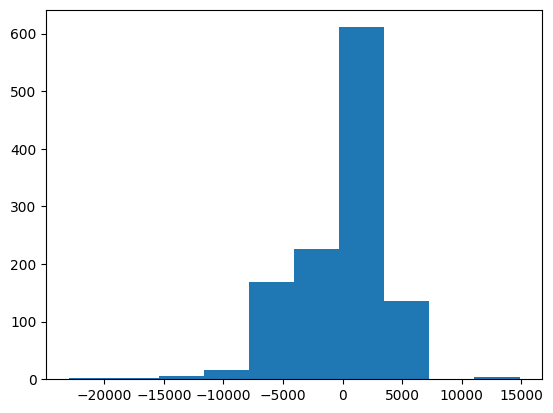

[15.  10.   5.   2.5  1. ]


'\nUsing a normality test to assess the distribution of error terms is an important skill. Notice how the null hypothesis of normal distribution is rejected at all significance levels. Therefore, you can conclude that the errors are not normally distributed, and there is room for improvement in the model. In particular, notice in your histogram how there are many errors between $0 and $5,000. This indicates that many salaries are about $5,000 higher than what was predicted.\n'

In [5]:
# exercise 02

"""
Distribution of errors

Almost no real-world process can be predicted perfectly. A desirable outcome is that the error is normally distributed. This means that some actual values will be above your prediction, and some will fall below it. That is, the errors (i.e. the difference between the actual values and predictions) will seem to "float" randomly around zero.

In this exercise, you will analyze results from a pre-built linear model which predicts a police officer's salary. You will then look at the error and see if it is approximately normally distributed. The predictions are a list of values stored in preds, and the actual salaries are a list of values stored in salaries.
"""

# Instructions

"""

    Compute the error as the actual salaries minus the predicted salaries.
    Plot the errors in a histogram.
    Conduct an Anderson-Darling test of normality for the errors.
    Find and print the significance_level(s) at which the null hypothesis would be rejected.

"""

# solution

# Compute the error as actual minus predicted salary
error = salaries - preds

# Plot the errors as a histogram
plt.hist(error)
plt.show()

# Conduct an Anderson-Darling test using the years of experience
result = stats.anderson(error)

# Find where the result is significant
print(result.significance_level[result.statistic > result.critical_values])

#----------------------------------#

# Conclusion

"""
Using a normality test to assess the distribution of error terms is an important skill. Notice how the null hypothesis of normal distribution is rejected at all significance levels. Therefore, you can conclude that the errors are not normally distributed, and there is room for improvement in the model. In particular, notice in your histogram how there are many errors between $0 and $5,000. This indicates that many salaries are about $5,000 higher than what was predicted.
"""

In [6]:
salary_df[salary_df['Years of Employment'] <= 10]

,Title,Gender,Ethnicity,Annual Salary,Years of Employment
11,Fire Specialist,M,Hispanic or Latino,72383.48,6
14,Fire Specialist,M,Hispanic or Latino,75999.56,7
19,Fire Specialist,M,Hispanic or Latino,75999.56,7
34,Fire Specialist,M,Hispanic or Latino,75999.04,7


In [7]:
# exercise 03

"""
Fitting a normal distribution

When working with relatively small data sets you often don't have enough data to make principled inference. However, if you suspect the data follows a normal distribution, it may be reasonable to fit a normal distribution and work with this, rather than with the raw data. In this exercise you will work the same data on Hispanic firefighters which you previously showed was normally distributed at the 5% level. You will fit a normal distribution to it, and use this to find the percentage of these employees we would generally expect to have less than 10 years of experience.

This DataFrame has been loaded for you in salary_df. The packages pandas as pd, NumPy as np, Matplotlib as plt, and the stats package from SciPy have all been loaded for you.
"""

# Instructions

"""

    Fit a normal distribution to the Years of Employment column and save the resulting mean and standard deviation.
    Use this mean and standard deviation in a normal CDF to estimate the percentage of employees with less than ten years of experience.
    Print out this percentage.

"""

# solution

# Fit a normal distribution to the data
mu, std = stats.norm.fit(salary_df['Years of Employment'])

# Compute the percentage of employees with less than 10 years experience
percent = stats.norm.cdf(10, loc=mu, scale=std)

# Print out this percentage
print(percent)

#----------------------------------#

# Conclusion

"""
Since the sample of Hispanic firefighters in this dataset is relatively small, working with a model helps you avoid the noise inherent in small data sets. Note how you were able to make a precise estimate of the percent of these firefighters with less than ten years experience, even though the number of firefighters in the data set with this little experience is only four!
"""

0.11763652155343629


'\nSince the sample of Hispanic firefighters in this dataset is relatively small, working with a model helps you avoid the noise inherent in small data sets. Note how you were able to make a precise estimate of the percent of these firefighters with less than ten years experience, even though the number of firefighters in the data set with this little experience is only four!\n'

In [8]:
dates = pd.read_csv(path_data+'dates.csv', parse_dates=[0], date_format="%Y-%m-%d").values
houston_rents = np.genfromtxt(path_data+'houston_rents.csv', delimiter=',')
lasvegas_rents = np.genfromtxt(path_data+'lasvegas_rents.csv', delimiter=',')

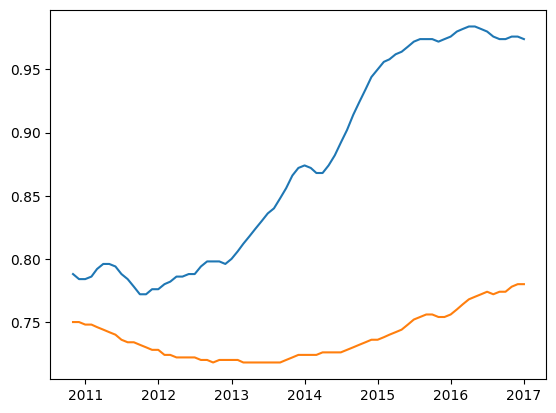

True
0.4821621973882167


'\nMaking the connections between graphs, correlation coefficients, and their associated p-values is very powerful. Notice how the graphs seem to suggest some sort of positive correlation, and the strong correlation coefficient and extremely low p-value cement this fact. You can feel confident claiming that there is a strong relationship in rent prices between these two cities.\n'

In [9]:
# exercise 04

"""
Testing for correlation

You want to understand if rent prices in Las Vegas and Houston are correlated or not. If you see prices rising in Las Vegas, is it reasonable to assume they are also rising in Houston? A NumPy array of rents has been loaded for Las Vegas (lasvegas_rents) and Houston (houston_rents), as well as the dates associated with each measurement.

The packages pandas as pd, NumPy as np, Matplotlib as plt, and the stats package from SciPy have all been loaded for you.
"""

# Instructions

"""

    Create a line graph with two lines, one for houston_rents and one for lasvegas_rents, using the dates on the x-axis.
    Compute the Pearson correlation coefficient and its associated p-value.
    Determine and print out a Boolean that tells you whether the p-value is significant at the 5% level.
    Print out R-squared.

"""

# solution

# Create a line graph showing the rents for both San Francisco and Las Vegas
plt.plot(dates, houston_rents, label='Houston')
plt.plot(dates, lasvegas_rents, label='Las Vegas')
plt.show()

# Compute the Pearson correlation coefficient R, as well as the p-value
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print if the p-value is less than alpha = 5%
print(p_value < 0.05)

# Print out R-squared
print(r**2)

#----------------------------------#

# Conclusion

"""
Making the connections between graphs, correlation coefficients, and their associated p-values is very powerful. Notice how the graphs seem to suggest some sort of positive correlation, and the strong correlation coefficient and extremely low p-value cement this fact. You can feel confident claiming that there is a strong relationship in rent prices between these two cities.
"""

In [10]:
la_rents = np.genfromtxt(path_data+'la_rents.csv', delimiter=',')

la_rents

array([0.   , 1.578, 1.578, 1.58 , 1.582, 1.586, 1.588, 1.59 , 1.594,
       1.594, 1.594, 1.592, 1.59 , 1.592, 1.592, 1.59 , 1.588, 1.588,
       1.588, 1.59 , 1.588, 1.59 , 1.588, 1.592, 1.594, 1.598, 1.602,
       1.608, 1.616, 1.622, 1.628, 1.634, 1.64 , 1.648, 1.656, 1.662,
       1.672, 1.676, 1.682, 1.68 , 1.68 , 1.678, 1.682, 1.688, 1.696,
       1.708, 1.72 , 1.738, 1.76 , 1.78 , 1.8  , 1.816, 1.834, 1.85 ,
       1.862, 1.87 , 1.878, 1.888, 1.9  , 1.908, 1.914, 1.92 , 1.93 ,
       1.948, 1.962, 1.978, 1.99 , 2.004, 2.018, 2.026, 2.032, 2.038,
       2.042, 2.048, 2.056, 2.064])

In [11]:
# exercise 05

"""
Autocorrelation

Do rent prices tend to show a similar pattern when compared year-over-year? If you take the rent prices in Los Angeles and compare them to rent prices one year in the past, will you see a significant relationship? In other words, do rent prices in Los Angeles demonstrate autocorrelation?

A NumPy array of rents has been loaded for Los Angeles (la_rents), as well as the dates associated with each measurement, have been loaded for you. The packages pandas as pd, NumPy as np, Matplotlib as plt, and the stats package from SciPy have all been loaded as well.
"""

# Instructions

"""

    Select all but the first twelve rents (to exclude the first year) from la_rents.
    Select all but the last twelve rents (to exclude the last year) from la_rents.
    Compute the Pearson correlation coefficient R between these two lists.
    Check if the p-value is significant at the 5% level.
---
Question

Autocorrelation is a powerful tool as it helps you understand to what the extent the past can explain the future. Notice how there is a very strong relationship between the rent prices one year in the past versus the present. This tells you that rents year-over-year tend to follow very similar patterns.

Given what you have just seen, would it be appropriate to conduct a t-test comparing the mean rent prices in each city?
[No, since the data is autocorrelated, the assumption of independence in a t-test would be violated.]
"""

# solution

# Select all but the first twelve rents
la_rents_initial = la_rents[12:]

# Select all but the last twelve rents (12 month lag)
la_rents_lag = la_rents[:-12]

# Compute the correlation between the initial values and the lagged values
r, p_value = stats.pearsonr(la_rents_initial, la_rents_lag)

# Check if the p-value is significant at the 5% level
print(p_value < 0.05)

#----------------------------------#

# Conclusion

"""
Excellent! You may be tempted to perform a t-test to compare mean rent prices in each city. However, as t-test has the assumption of independence, which autocorrelation directly violates. Thus any results from a t-test would be invalid.
"""

True


'\nExcellent! You may be tempted to perform a t-test to compare mean rent prices in each city. However, as t-test has the assumption of independence, which autocorrelation directly violates. Thus any results from a t-test would be invalid.\n'

In [12]:
# exercise 06

"""
Explained variance

You saw that rent prices between Houston and Las Vegas are correlated. However, to what extent can the price change in one city explain the price change in another city? By computing R-squared you are able to precisely quantify this.

A NumPy array of rents has been loaded for Las Vegas (lasvegas_rents) and Houston (houston_rents), as well as the dates associated with each measurement. The packages pandas as pd, NumPy as np, Matplotlib as plt, and the stats package from SciPy have all been loaded for you.
"""

# Instructions

"""

    Compute the Pearson correlation coefficient between houston_rents and lasvegas_rents.
    Print the square of the correlation coefficient.

"""

# solution

# Compute the correlation between Houston and Las Vegas
r, p_value = stats.pearsonr(houston_rents, lasvegas_rents)

# Print R-squared
print(r**2)

#----------------------------------#

# Conclusion

"""
R-squared gives us a precise measurement of the percentage of explained variance. Here we see that 48% of the variance of rent prices in Houston can be explained by knowing the rent prices in Las Vegas. An interesting question would be, what explains the remaining 52% of the variation?
"""

0.4821621973882167


'\nR-squared gives us a precise measurement of the percentage of explained variance. Here we see that 48% of the variance of rent prices in Houston can be explained by knowing the rent prices in Las Vegas. An interesting question would be, what explains the remaining 52% of the variation?\n'

In [13]:
investments_df = pd.read_csv(path_data+'investments_VC.csv')
investments_df.head()

,market,funding_total_usd,status,country_code,funding_rounds,seed,venture,equity_crowdfunding,private_equity
0,Games,4000000,operating,USA,2,0,4000000,0,0
1,Software,7000000,NaN,USA,1,0,7000000,0,0
2,Advertising,4912393,closed,ARG,1,0,0,0,0
3,Curated Web,2000000,operating,NaN,1,0,2000000,0,0
4,Games,41250,operating,HKG,1,41250,0,0,0


In [14]:
# exercise 07

"""
Equal variance

Different industries have different levels of investment from venture capitalists (VCs). However, if you look at a sample of VC investments and see slightly different average investment amounts, is it reasonable to assume this difference is statistically significant? This is a perfect situation for ANOVA. However, a key condition for ANOVA is equal variance between all groups of samples. In this exercise you'll test for that using the Levene test of equal variance.

A pandas DataFrame of investments of three industries (Biotechnology, Enterprise Software and Health Care) has been loaded for you in investments_df. The packages pandas as pd, NumPy as np, Matplotlib as plt, and the stats package from SciPy have all been loaded as well.
"""

# Instructions

"""

    Select the funding for each market individually from investments_df using the column names given.
    Conduct Levene tests for equal variance between each pair of industries, in the following order: (i) Biotechnology and Enterprise Software, (ii) Biotechnology and Health Care, and (iii) Enterprise Software and Health Care, corresponding to statistic1, statistic2, and statistic3, respectively.
    In each case, return a Boolean that indicates whether the null hypothesis of equal variance is rejected.

"""

# solution

# Select each industry separately
biotech_df = investments_df[investments_df['market'] == 'Biotechnology']
enterprise_df = investments_df[investments_df['market'] == 'Enterprise Software']
health_df = investments_df[investments_df['market'] == 'Health Care']

# Conduct Levene tests for equal variance between funding_total_usd for all pairs of industries
statistic_1, p_value_1 = stats.levene(biotech_df['funding_total_usd'], enterprise_df['funding_total_usd'])
statistic_2, p_value_2 = stats.levene(biotech_df['funding_total_usd'], health_df['funding_total_usd'])
statistic_3, p_value_3 = stats.levene(enterprise_df['funding_total_usd'], health_df['funding_total_usd'])

# Print if the p-value is significant at the 5% level
print(p_value_1 < 0.05, p_value_1)
print(p_value_2 < 0.05, p_value_2)
print(p_value_3 < 0.05, p_value_3)

#----------------------------------#

# Conclusion

"""
Checking the required conditions for hypothesis tests is often overlooked, great job being thorough! Notice how two of the three industry pairs had very low p-values, so you can feel confident that their variance is equal. One pair (enterprise and biotech) had a larger p-value around 0.1. This indicates that there may be a little larger difference in variation than we would generally like. However, for our purposes this difference is small enough that we can proced with our ANOVA test.
"""

False 0.10608810895774416
True 0.003769504493494368
True 0.0014358847125619865


'\nChecking the required conditions for hypothesis tests is often overlooked, great job being thorough! Notice how two of the three industry pairs had very low p-values, so you can feel confident that their variance is equal. One pair (enterprise and biotech) had a larger p-value around 0.1. This indicates that there may be a little larger difference in variation than we would generally like. However, for our purposes this difference is small enough that we can proced with our ANOVA test.\n'

In [16]:
ecommerce_df = investments_df[investments_df['market'] == 'E-Commerce']

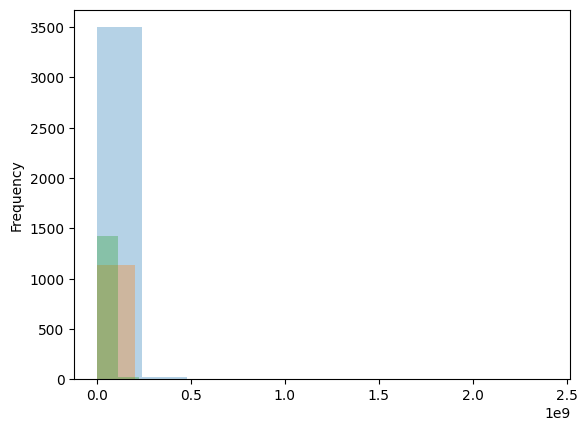

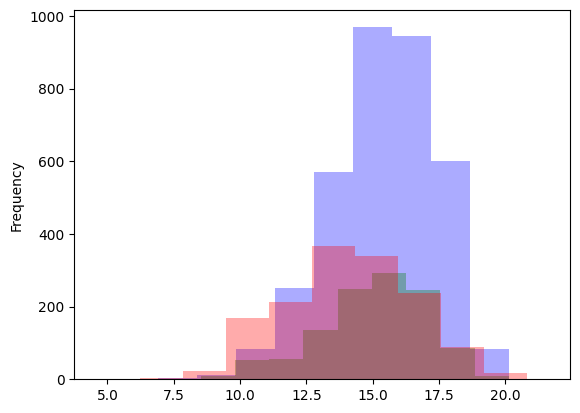

'\nNotice how the raw data was not remotely normal, and was heavily right-skewed. As discussed in the video, one common fix is to apply a log-transformation. The log-transformation changed things drastically! Now all three appear at least approximately normal. If very high levels of precision were required, you could do an Anderson test for normality like you did in an earlier lesson. For the purposes of our analysis, a visual inspection is enough.\n'

In [17]:
# exercise 08

"""
Normality of groups

Now that you've established equal variance, the next condition to check for is normality of the funding in each industry.

In this exercise, you'll visualize and compare data with and without normality. Although these visualizations can be created with plt.hist(), for this exercise, you'll practice using the .plot() argument on a DataFrame, with the arguments kind and alpha.

The three DataFrames you created (biotech_df, enterprise_df and ecommerce_df) have been loaded for you. The packages pandas as pd, NumPy as np, Matplotlib as plt, and the stats package from SciPy have all been loaded as well.
"""

# Instructions

"""

    Plot a histogram with 33% transparency for each industry's funding_total_usd in the following order: Biotechnology, then Enterprise Software, and then E-commerce.
---

    Make a histogram of the log-transform each industry's funding.

"""

# solution

# Plot a histogram of the funding for each industry
biotech_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
enterprise_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
ecommerce_df['funding_total_usd'].plot(kind='hist', alpha=0.33)
plt.show()

#----------------------------------#

# Plot a histogram of the log funding for each industry
np.log(biotech_df['funding_total_usd']).plot(kind='hist', color='blue', alpha=0.33)
np.log(enterprise_df['funding_total_usd']).plot(kind='hist', color='green', alpha=0.33)
np.log(ecommerce_df['funding_total_usd']).plot(kind='hist', color='red', alpha=0.33)
plt.show()

#----------------------------------#

# Conclusion

"""
Notice how the raw data was not remotely normal, and was heavily right-skewed. As discussed in the video, one common fix is to apply a log-transformation. The log-transformation changed things drastically! Now all three appear at least approximately normal. If very high levels of precision were required, you could do an Anderson test for normality like you did in an earlier lesson. For the purposes of our analysis, a visual inspection is enough.
"""

In [18]:
# exercise 09

"""
ANOVA

Now that you've established equal variance using a Levene test and assessed visually the approximate normality of the log-transformed salaries, it's time to conduct an ANOVA test! Recall that the purpose of the ANOVA test is to determine if biotech, enterprise software and health care companies had equal average funding. Since these three groups satisfy the conditions of an ANOVA test, you know the conclusions from that test will be valid.

The DataFrames you created (biotech_df, enterprise_df and health_df) have been loaded for you. The packages pandas as pd, NumPy as np, Matplotlib as plt, and the stats package from SciPy have all been loaded as well. The log-transforms of the funding values that you computed in a previous exercise are provided for you.
"""

# Instructions

"""

    Conduct a one-way ANOVA test using each of the three log-transformed fundings in the following order of arguments: Biotechnology, Enterprise Software, Health Care.
    Print out if the p-value is significant at 5%.

"""

# solution

biotech_log_funding = np.log(biotech_df['funding_total_usd'])
enterprise_log_funding = np.log(enterprise_df['funding_total_usd'])
health_log_funding = np.log(health_df['funding_total_usd'])

# Conduct a one-way ANOVA test to compare the log-funding
s, p_value = stats.f_oneway(biotech_log_funding,enterprise_log_funding,health_log_funding)

# Print if the p-value is significant at 5%
print(p_value < 0.05)

#----------------------------------#

# Conclusion

"""
Just by visual inspection, each market's mean funding was fairly close. It may be hard to know if those differences are due to true differences, or are just an artifact of working with a sample. By using a ANOVA test and properly checking all conditions you can be quite sure that the conclusion to reject the null and claim that differences are indeed due to the markets is sound. Great work!
"""

True


"\nJust by visual inspection, each market's mean funding was fairly close. It may be hard to know if those differences are due to true differences, or are just an artifact of working with a sample. By using a ANOVA test and properly checking all conditions you can be quite sure that the conclusion to reject the null and claim that differences are indeed due to the markets is sound. Great work!\n"

In [19]:
rankings_df = pd.read_csv(path_data+'university_rankings.csv')
rankings_df.head()

,University,thew_rank,arw_rank,cw_rank,thew_score,arw_score,cw_score
0,Harvard University,1,1,1,96.1,100.0,100.00
1,Stanford University,4,3,3,94.3,73.4,89.50
2,University of Cambridge,6,2,4,91.2,73.6,86.17
3,California Institute of Technology,2,6,5,96.0,67.1,85.21
4,Princeton University,5,8,6,94.2,60.9,82.50


In [20]:
# exercise 10

"""
Comparing rankings

A number of organizations rank universities on factors such as research, teaching, and student satisfaction, among other factors. Three such organizations include the Times Higher Education World (THEW) University Ranking, the Academic Ranking (ARW) of World Universities, and the Center for World (CW) University Rankings. However, it's common for these organizations to give different ranks for the same university. How can you quantitatively measure the agreement or disagreement between rankings? One approach is to use a non-parametric rank correlation coefficient such as Kendall's tau.

A DataFrame with three different these three sets of rankings in rankings_df. The packages pandas as pd, NumPy as np, and the stats package from SciPy have all been loaded for you.
"""

# Instructions

"""

    Compute Kendall's tau rank correlation coefficient between columns thew_rank and arw_rank.
    Compute Kendall's tau between the thew_rank and cw_rank columns.
    Compute Kendall's tau between the arw_rank and cw_rank columns.
---
Question

Which two organizations had the highest degree of agreement? Use the console to examine the output (tau_thew_arw, tau_thew_cw and tau_arw_cw, as well as p_value_thew_arw, p_value_thew_cw and p_value_arw_cw).
[tau_arw_cw]

"""

# solution

# Compute Kendall's tau between the THEW and ARW rankings
tau_thew_arw, p_value_thew_arw = stats.kendalltau(rankings_df['thew_rank'], rankings_df['arw_rank'])

# Compute Kendall's tau between the THEW and CW rankings
tau_thew_cw, p_value_thew_cw = stats.kendalltau(rankings_df['thew_rank'], rankings_df['cw_rank'])

# Compute Kendall's tau between the ARW and CW rankings
tau_arw_cw, p_value_arw_cw = stats.kendalltau(rankings_df['arw_rank'], rankings_df['cw_rank'])

print((tau_thew_arw, tau_thew_cw, tau_arw_cw))

#----------------------------------#

# Conclusion

"""
Notice how ARW and CW have the largest value of tau, indicating the highest level of agreement. This is also reflected in them having a lower p-value. However, this is a two-tailed test, so if these two had a very high level of _disagreement_, the p-value would also be very low. Thus examining tau itself is important! Also, note that while you may have been tempted to use Pearson's R to measure correlation, since the data was ranked, inference based on Pearson's R likely would have been invalid! In this case, Kendall's tau is the right tool for the job!
"""

(0.6512525427983284, 0.6623882222760947, 0.7196922583826684)


"\nNotice how ARW and CW have the largest value of tau, indicating the highest level of agreement. This is also reflected in them having a lower p-value. However, this is a two-tailed test, so if these two had a very high level of _disagreement_, the p-value would also be very low. Thus examining tau itself is important! Also, note that while you may have been tempted to use Pearson's R to measure correlation, since the data was ranked, inference based on Pearson's R likely would have been invalid! In this case, Kendall's tau is the right tool for the job!\n"

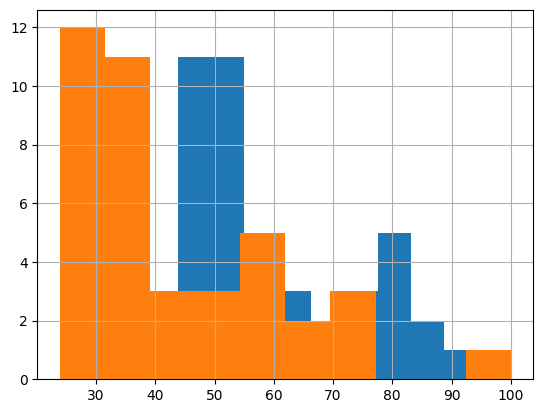

True


'\nWorking with medians rather than means can be important if your data is skewed, such as you have here. While the means may or may not be equal, the means may not be representative of the center of your data. So making inference on them may not fully describe your data. In this case the data is most certainly not symmetric, as you saw far more universities with a ranking near 50 and a tail leading out to 100. When you see a skewed distribution, this tells you that the mean is likely not an ideal measure of central tendency. Great job starting off by inspecting your data!\n'

In [22]:
# exercise 11

"""
Comparing medians

Parametric tests tend to compare means, while non-parametric tests tend to compare medians. This is because if your data is skewed, the mean may not be a good measure of central tendency, and you should work with the median instead.

Each of the university ranking organizations you just looked at also included a "total score" for each university. You'll start by determining if the scores are approximately normal by using a histogram. If they are not, you will perform a Mood's median test to compare their medians. In this exercise you'll work with the CW and ARW university rankings.

Again, while there are multiple ways to create histograms, you'll practice using the .hist() method as before.

A DataFrame with three different these three sets of rankings in rankings_df. The packages pandas as pd, NumPy as np, Matplotlib.pyplot as plt, and the stats package from SciPy have all been loaded for you.
"""

# Instructions

"""

    Plot a histogram of the cw_score column.
---

    Plot a histogram of the arw_score column.
---

    Conduct a Mood's median test to test if the median scores for ARW and CW are equal.
    Print out a Boolean value that indicates whether the p-value is less than the significance level of 5%.

"""

# solution

# Plot a histogram of the CW total score
rankings_df['cw_score'].hist()

# Plot a histogram of the ARW total score
rankings_df['arw_score'].hist()
plt.show()

# Conduct a Mood's median test comparing cw_score and arw_score
s, p_value, med, table = stats.median_test(rankings_df['cw_score'], rankings_df['arw_score'])

# Check if the p-value is significant at 5%
print(p_value < 0.05)

#----------------------------------#

# Conclusion

"""
Working with medians rather than means can be important if your data is skewed, such as you have here. While the means may or may not be equal, the means may not be representative of the center of your data. So making inference on them may not fully describe your data. In this case the data is most certainly not symmetric, as you saw far more universities with a ranking near 50 and a tail leading out to 100. When you see a skewed distribution, this tells you that the mean is likely not an ideal measure of central tendency. Great job starting off by inspecting your data!
"""